<a href="https://colab.research.google.com/github/frianlh/DataMining-Project/blob/main/Case_Study_1_Group_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 1: EDA**
# **Data Mining and Business Intelligence**



# **Library**

In [214]:
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.cm as cm
import calendar, folium
from folium.plugins import HeatMap
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use('bmh'); sns.set()

# **Data Set**

In [109]:
# Get Data
try:
    dfJakarta = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfDepok = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfBogor = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfTangerang = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfBekasi = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJakarta = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfDepok = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfBogor = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfTangerang = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfBekasi = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')

## **Jakarta**

In [110]:
dfJakarta.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
dfJakarta.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
dfJakarta.shape

(1024, 26)

In [113]:
dfJakarta.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [114]:
dfJakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [115]:
# Drop Column for "Unamed"
dfJakarta.drop(dfJakarta.iloc[:, 14:26], inplace = True, axis = 1)

In [116]:
# Drop Row All NaN
dfJakarta.dropna(how = 'all', inplace = True)

In [206]:
dfJakarta.shape

(121, 13)

In [119]:
# Add Column "Kota"
dfJakarta = dfJakarta.assign(Kota = 'Jakarta')

In [162]:
# Price in
dfJakarta['harga'] = dfJakarta['harga']/10**(6)

In [175]:
dfJakarta.dtypes

created_at     object
LT            float64
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
Kota           object
dtype: object

In [176]:
# Missing Values
print(dfJakarta.isnull().sum())

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi        77
carport       31
lokasi         0
sertifikat     2
listrik        1
hadap         85
harga          0
URL            0
deskripsi      9
Kota           0
dtype: int64


In [181]:
dfJakarta.drop("garasi", axis=1, inplace=True)
dfJakarta.drop("hadap", axis=1, inplace=True)

## **Depok**

In [120]:
dfDepok.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
dfDepok.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
dfDepok.shape

(998, 26)

In [207]:
dfDepok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 121
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  119 non-null    object 
 1   LT          120 non-null    object 
 2   LB          118 non-null    float64
 3   KT          118 non-null    float64
 4   KM          118 non-null    float64
 5   carport     94 non-null     float64
 6   lokasi      118 non-null    object 
 7   sertifikat  118 non-null    object 
 8   listrik     103 non-null    float64
 9   harga       118 non-null    float64
 10  URL         118 non-null    object 
 11  deskripsi   118 non-null    object 
 12  Kota        120 non-null    object 
dtypes: float64(6), object(7)
memory usage: 13.1+ KB


In [125]:
# Drop Column for "Unamed"
dfDepok.drop(dfDepok.iloc[:, 14:26], inplace = True, axis = 1)

In [128]:
# Drop Row All NaN
dfDepok.dropna(how = 'all', inplace = True)

In [129]:
dfDepok.shape

(120, 14)

In [130]:
# Add Column "Kota"
dfDepok = dfDepok.assign(Kota = 'Depok')

In [184]:
# Missing Values
print(dfDepok.isnull().sum())

created_at     1
LT             0
LB             2
KT             2
KM             2
garasi        95
carport       26
lokasi         2
sertifikat     2
listrik       17
hadap         58
harga          2
URL            2
deskripsi      2
Kota           0
dtype: int64


In [186]:
dfDepok.drop("garasi", axis=1, inplace=True)
dfDepok.drop("hadap", axis=1, inplace=True)

## **Bogor**

In [133]:
dfBogor.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
dfBogor.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
dfBogor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [136]:
dfBogor.shape

(999, 26)

In [137]:
# Drop Column for "Unamed"
dfBogor.drop(dfBogor.iloc[:, 14:26], inplace = True, axis = 1)

In [138]:
# Drop Row All NaN
dfBogor.dropna(how = 'all', inplace = True)

In [139]:
dfBogor.shape

(193, 14)

In [140]:
# Add Column "Kota"
dfBogor = dfBogor.assign(Kota = 'Bogor')

In [164]:
# Price in
dfBogor['harga'] = dfBogor['harga']/10**(6)

In [187]:
# Missing Values
print(dfBogor.isnull().sum())

created_at      0
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      0
listrik         0
hadap         174
harga           0
URL             0
deskripsi       0
Kota            0
dtype: int64


In [189]:
dfBogor.drop("garasi", axis=1, inplace=True)
dfBogor.drop("hadap", axis=1, inplace=True)

## **Tangerang**

In [142]:
dfTangerang.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
dfTangerang.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
dfTangerang.shape

(128, 26)

In [145]:
dfTangerang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [146]:
# Drop Column for "Unamed"
dfTangerang.drop(dfTangerang.iloc[:, 14:26], inplace = True, axis = 1)

In [147]:
# Drop Row All NaN
dfTangerang.dropna(how = 'all', inplace = True)

In [148]:
dfTangerang.shape

(124, 14)

In [149]:
# Add Column "Kota"
dfTangerang = dfTangerang.assign(Kota = 'Tangerang')

In [188]:
# Missing Values
print(dfTangerang.isnull().sum())

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi        86
carport       32
lokasi         0
sertifikat     2
listrik       13
hadap         75
harga          0
URL            0
deskripsi      0
Kota           0
dtype: int64


In [190]:
dfTangerang.drop("garasi", axis=1, inplace=True)
dfTangerang.drop("hadap", axis=1, inplace=True)

## **Bekasi**

In [151]:
dfBekasi.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
dfBekasi.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
dfBekasi.shape

(992, 26)

In [154]:
dfBekasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [155]:
# Drop Column for "Unamed"
dfBekasi.drop(dfBekasi.iloc[:, 14:26], inplace = True, axis = 1)

In [156]:
# Drop Row All NaN
dfBekasi.dropna(how = 'all', inplace = True)

In [157]:
dfBekasi.shape

(107, 14)

In [158]:
# Add Column "Kota"
dfBekasi = dfBekasi.assign(Kota = 'Bekasi')

In [165]:
# Price in
dfBekasi['harga'] = dfBekasi['harga']/10**(6)

In [191]:
# Missing Values
print(dfBekasi.isnull().sum())

created_at     0
LT             0
LB             0
KT             0
KM             1
garasi        74
carport       26
lokasi         0
sertifikat     1
listrik        6
hadap         59
harga          0
URL            0
deskripsi      0
Kota           0
dtype: int64


In [192]:
dfBekasi.drop("garasi", axis=1, inplace=True)
dfBekasi.drop("hadap", axis=1, inplace=True)

In [202]:
dfDepok.dtypes

created_at     object
LT             object
LB            float64
KT            float64
KM            float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
harga         float64
URL            object
deskripsi      object
Kota           object
dtype: object

## **Data Merge**

In [197]:
# Merge Data
df = pd.concat([dfJakarta, dfDepok, dfBogor, dfTangerang, dfBekasi])
df.head()

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,Jakarta Pusat,SHM,2200.0,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,Jakarta Pusat,SHM,2200.0,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,1.0,Jakarta Pusat,SHM,2200.0,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,1.0,Jakarta Pusat,SHM,2200.0,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 106
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  664 non-null    object 
 1   LT          665 non-null    object 
 2   LB          663 non-null    float64
 3   KT          663 non-null    float64
 4   KM          662 non-null    float64
 5   carport     550 non-null    float64
 6   lokasi      663 non-null    object 
 7   sertifikat  658 non-null    object 
 8   listrik     628 non-null    float64
 9   harga       663 non-null    float64
 10  URL         663 non-null    object 
 11  deskripsi   654 non-null    object 
 12  Kota        665 non-null    object 
dtypes: float64(6), object(7)
memory usage: 72.7+ KB


In [195]:
df.shape

(665, 13)

In [210]:
df = df[~df['LT'].isin(['- lokasi yang kami gunakan hanya per kecamatan','-harga yang kami gunakan adalah per satuan juta'])]

In [212]:
df['LT'] = df['LT'].astype('float64')
df['Kota'] = df['Kota'].astype('category')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
carport        float64
lokasi          object
sertifikat      object
listrik        float64
harga          float64
URL             object
deskripsi       object
Kota          category
dtype: object

## **Missing Values**

In [213]:
print(df.isnull().sum())

created_at      0
LT              0
LB              0
KT              0
KM              1
carport       113
lokasi          0
sertifikat      5
listrik        35
harga           0
URL             0
deskripsi       9
Kota            0
dtype: int64


# **Case 1**
Kualitas data yang dimiliki perusahaan.

**Jawab**

Semua database kota memiliki 12 kolom yang “Unnamed” dan data yang null, juga ratusan record yang null sehingga tidak ada informasi yang berguna untuk dimanfaatkan dari kolom tersebut.

# **Case 2**
Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

**Jawab**

Saran yang dapat diberikan untuk perbaikan data:
1. Tidak memisahkan data antar kota, sebaiknya dibuat dalam satu kolom data.
2. Menyamakan nominal harga.

# **Case 3**
Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

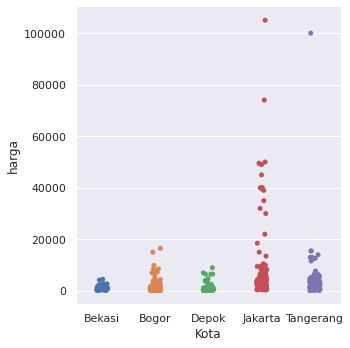

In [218]:
sns.catplot(x="Kota", y="harga", data = df)

Berdasarkan data yang terdapat pada perusahan PT Ray Pink Property Indonesia (RPPI), relatively memiliki range harga yang sama. Jika dilihat berdasarkan harga dan kota yang ada pada data, tidak didapatkan kecenderungan harga pada setiap Kota, namun terdapat beberapa data di DKI Jakarta yang memiliki harga cukup tinggi dibandingkan dengan Kota lain.

# **Case 4**

Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

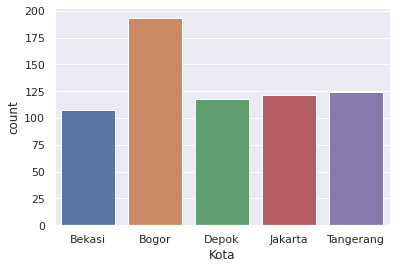

In [217]:
sns.countplot(x = "Kota", data = df)

Berdasarkan data penjualan properti (rumah) yang terdapat pada perusahaan PT Ray Pink Property Indonesia (RPPI) Kota Bogor memiliki penjualan lebih besar dibandingkan dengan Kota lainnya. Karena hal tersebutlah, dapat direkomendasikan bahwa di Kota Bogor perlu untuk dibuat cabang baru

# **Case 5**
Rumah dengan karakteristik seperti apa yang paling banyak dijual?

# **Case 6**
Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?